<table>
<tr>
    <td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
    <td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Geophysikalisches Praktikum: Create coordinates and elevation data -GPR-

## Create coordinates and elevation data 
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import libGP

----
## Read **elevation** data in `geodyn` format
We first need to load elevation data (in `geodyn5` format), which are needed for interpolating the 
elevation section of the profile.

In [5]:
easting,northing,elevation = libGP.readTopography("2Dm_GP2024_DTM.xy",path='./data/FUGeocampus/',iskip=5,control=True,plot=False)

File read:                  ./data/FUGeocampus/2Dm_GP2024_DTM.xy
Number of topo lines:       160810
Number of meta-data read:   9
Number of topo data read:   32160
min/max easting:            388200.0 388600.0
min/max northing:           5809500.0 5809900.0
min/max elevation:          40.45 46.21


----
## Create **coordinate** file
We use a set of manually taken GPS points along a profile, which need to be stored in a `numpy`array:

In [6]:
help(libGP.createGPRCoordElevation)

Help on function createGPRCoordElevation in module libGP:

createGPRCoordElevation(nameGPR, lProfile, sProfile, GPSPoints, easting, northing, elevation, traceInc=0, path='./', control=False, plot=False)
    Read GPS coordinates taken along GPR profile, 
    create coordinates for every nth trace icrement
    and interpolate elevation for traces from topo data
    
    Parameters
    ----------
    nameGPR : str
        name of GPR profile
    lProfile : float
        length of GPR profile  [m]
    sProfile : float
        spacing distance for profile [m]
    GPSPoints : 2D float array 
        List of GPS points easting,northing) along profile
    easting : 1D float array
        List of easting coordinates [m] (from readTopography.py)
    northing : 1D float array
        List of northing coordinates [m] (from readTopography.py)
    elevation : 1D float array
        List of elevations [m] (from readTopography.py)
    traceInc : float
        trace increment (from GPS recording)
    c

Then we define the number of electrode, `nElectrodes`, and the electrode spacing, `sElectrodes`.

A name is needed for the output profile data set, `ertProfile`.

nameGPR:                    GP2021_GPR02
lProfile:                   72
sProfile:                   1
nTraces:                    72
traceInc:                   0.1
GPS points:                 2
GPSDistance:                70.04535048811695
extrapolate last point
[[ 388456.735      5809761.262     ]
 [ 388386.51877629 5809777.1893955 ]]
GPSDistance:                71.99999999990735
   0 388456.73500000 5809761.26200000    43.55     0.00
   1 388455.75977467 5809761.48321383    43.74     1.00
   2 388454.78454934 5809761.70442765    43.80     2.00
   3 388453.80932401 5809761.92564148    43.80     3.00
   4 388452.83409868 5809762.14685531    43.77     4.00
   5 388451.85887335 5809762.36806913    43.75     5.00
   6 388450.88364802 5809762.58928296    43.76     6.00
   7 388449.90842269 5809762.81049678    43.77     7.00
   8 388448.93319737 5809763.03171061    43.77     8.00
   9 388447.95797204 5809763.25292444    43.78     9.00
  10 388446.98274671 5809763.47413826    43.80    10.00

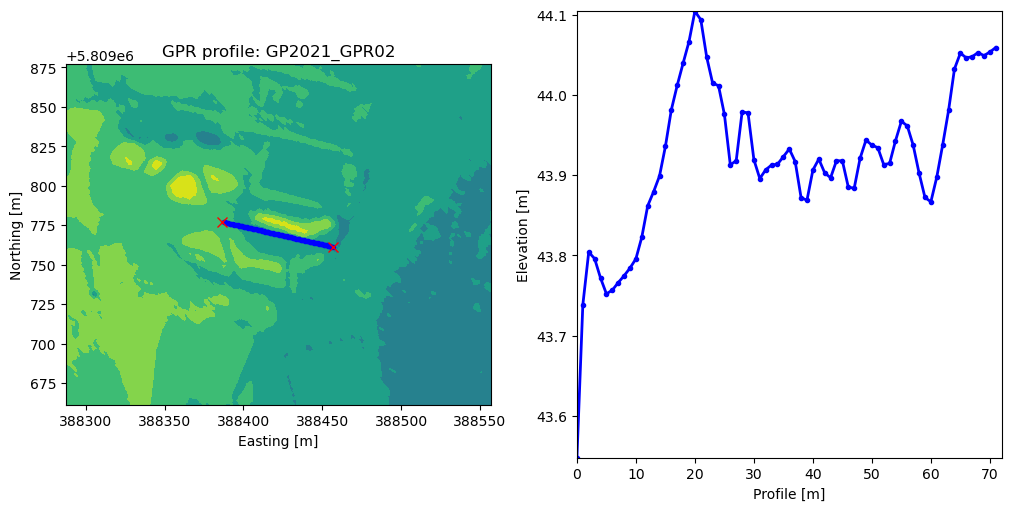

In [8]:
gprProfile  = 'GP2021_GPR02'
lProfile = 72
sProfile = 1
traceInc = 0.1
GPSPoints = np.array([
[388456.735,5809761.262],
[388388.425,5809776.757]
])

gprPoints = libGP.createGPRCoordElevation(gprProfile,lProfile,sProfile,GPSPoints,easting,northing,elevation,traceInc,
                                           path='tmp/',control=True,plot=True)

----
## Add **profile length and elevation** to **GPR data** in `ReflexW` format

Read in created file in ReflexW ...

----